<a href="https://colab.research.google.com/github/SantiagoMorenoV/50-Startups-Multiple-Reg/blob/main/R/50_St_ups_mult_linreg_Bck_Elim_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **50 Startups Multiple Linear Regression**

A venture capital fund wants to obtain a criterion to invest in fifty startups. We have a dataset containing their expenditure on R & D, administration and marketing, location (state), and profit. Thus, based on this data, we need to find which features are significant to profit.

# **Importing the dataset**

In [ ]:
dataset = read.csv('https://raw.githubusercontent.com/SantiagoMorenoV/50-Startups-Multiple-Reg/main/50_Startups.csv?token=GHSAT0AAAAAACAGCYI6ETRXB54FSR4FVYXYZBHL4OQ')
dataset

R.D.Spend,Administration,Marketing.Spend,State,Profit
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
165349.20,136897.80,471784.10,New York,192261.83
162597.70,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.90,99814.71,362861.36,New York,156991.12
134615.46,147198.87,127716.82,California,156122.51
130298.13,145530.06,323876.68,Florida,155752.60
120542.52,148718.95,311613.29,New York,152211.77


# **Descriptive statistics**

In [ ]:
summary(dataset)

   R.D.Spend      Administration   Marketing.Spend     State          
 Min.   :     0   Min.   : 51283   Min.   :     0   Length:50         
 1st Qu.: 39936   1st Qu.:103731   1st Qu.:129300   Class :character  
 Median : 73051   Median :122700   Median :212716   Mode  :character  
 Mean   : 73722   Mean   :121345   Mean   :211025                     
 3rd Qu.:101603   3rd Qu.:144842   3rd Qu.:299469                     
 Max.   :165349   Max.   :182646   Max.   :471784                     
     Profit      
 Min.   : 14681  
 1st Qu.: 90139  
 Median :107978  
 Mean   :112013  
 3rd Qu.:139766  
 Max.   :192262  

# **Variable distributions**

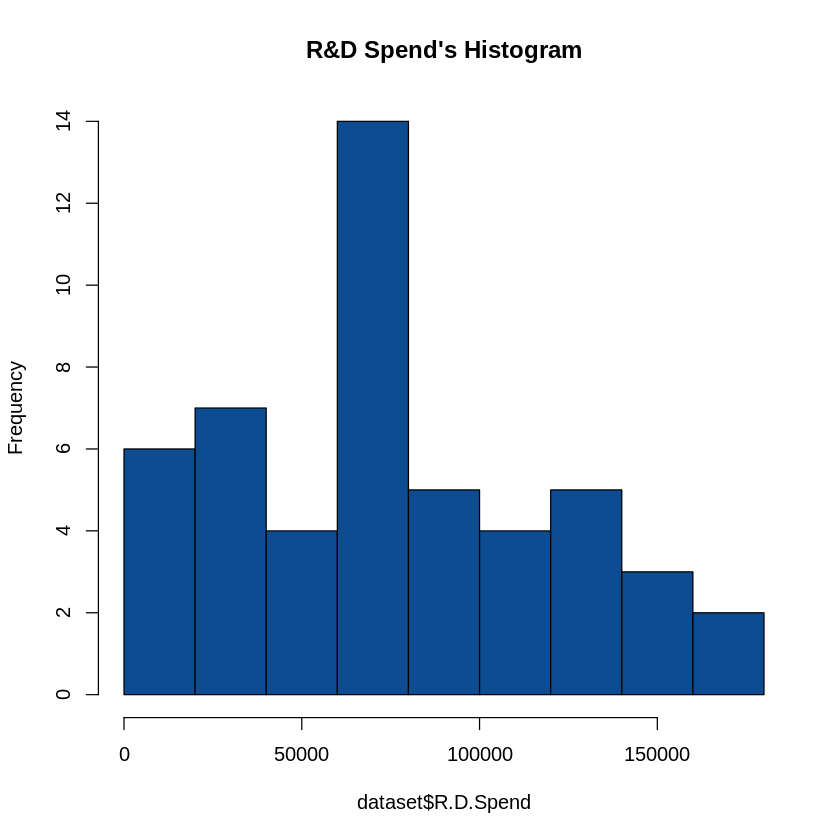

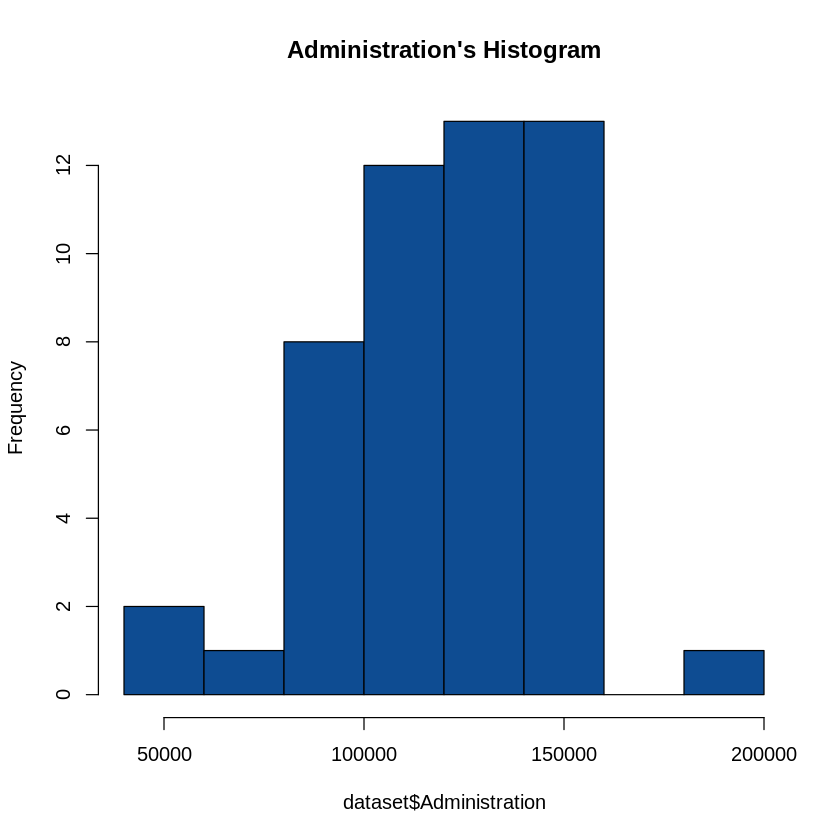

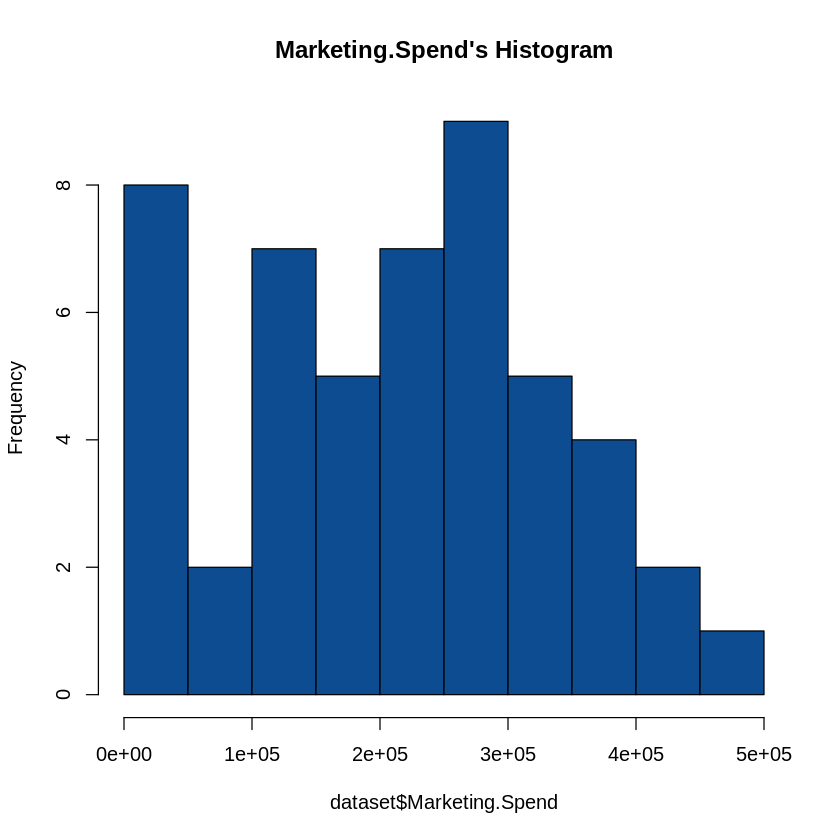

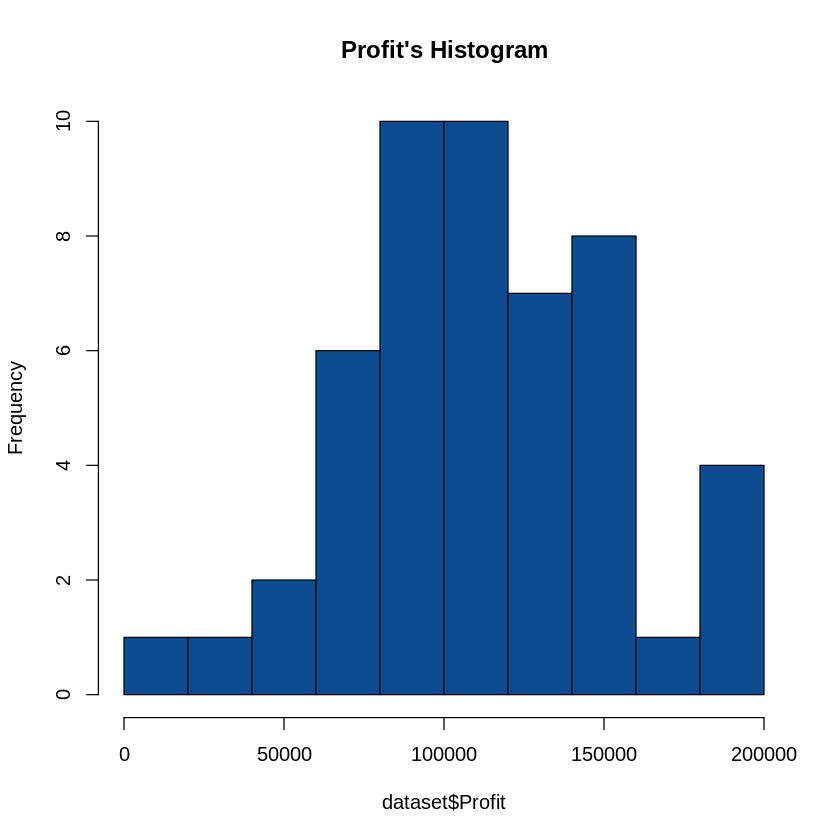

In [ ]:
hist(dataset$`R.D.Spend`, main = "R&D Spend's Histogram", col ='#0E4C92')
hist(dataset$`Administration`, main = "Administration's Histogram", col ='#0E4C92')
hist(dataset$`Marketing.Spend`, main = "Marketing.Spend's Histogram", col ='#0E4C92')
hist(dataset$`Profit`, main = "Profit's Histogram", col ='#0E4C92')

# **Boxplots**

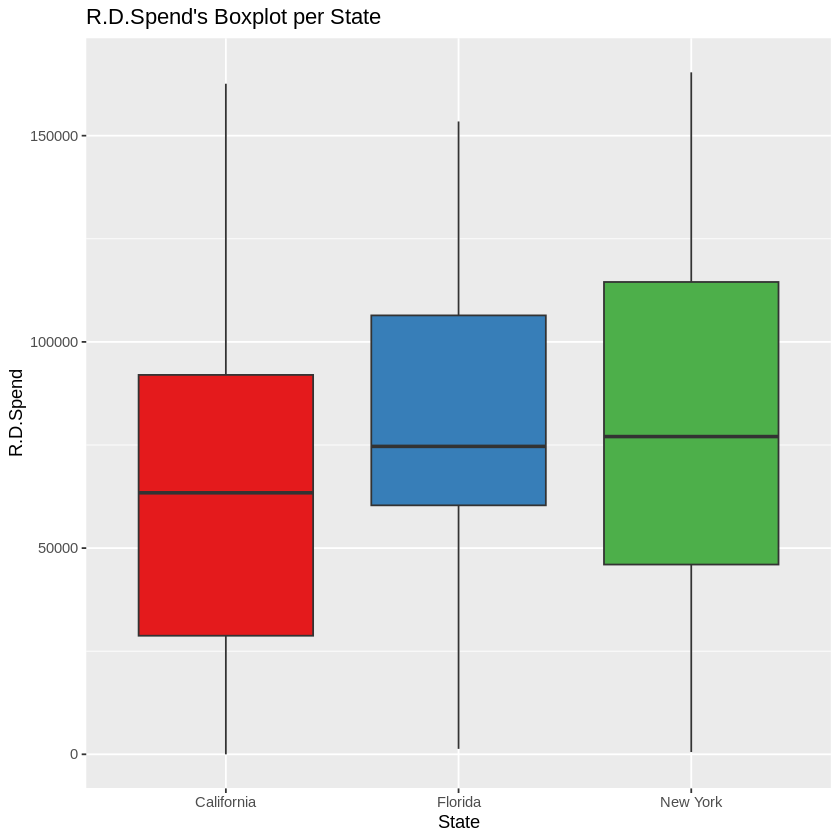

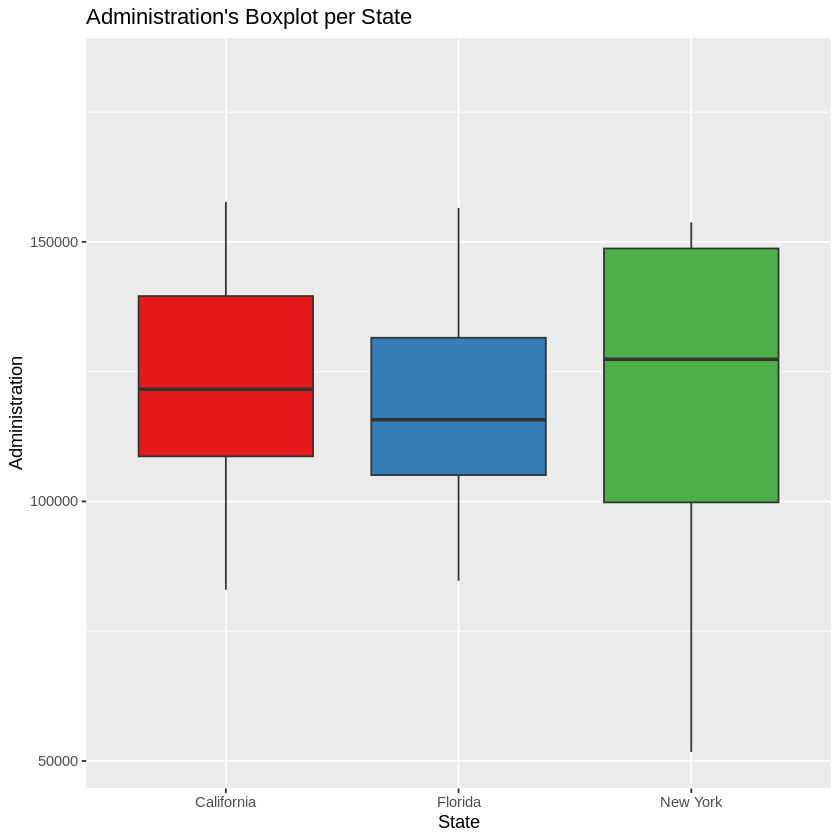

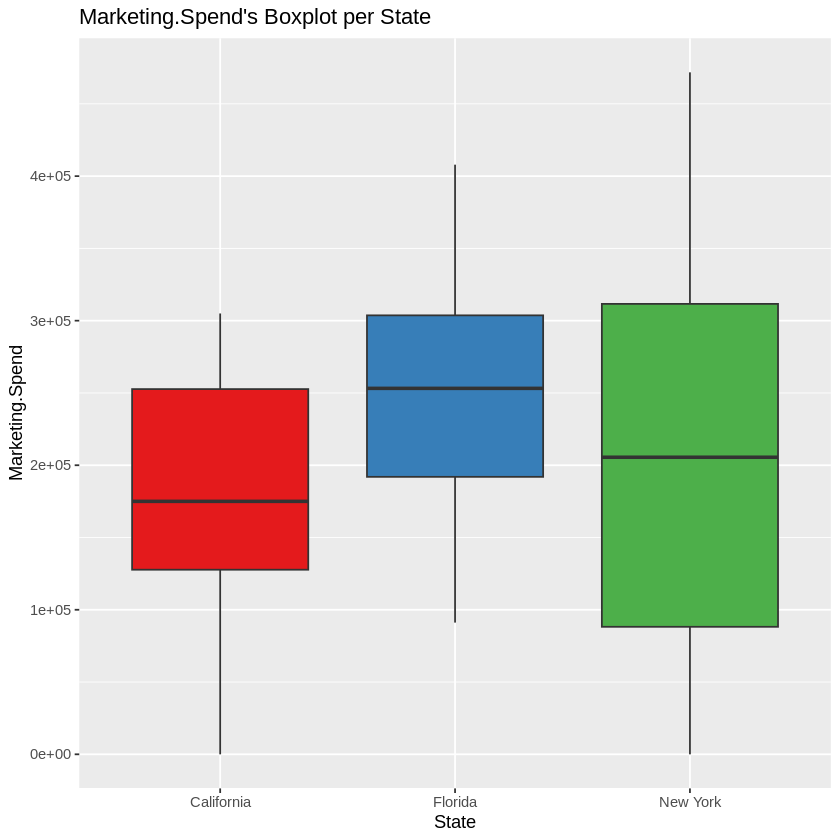

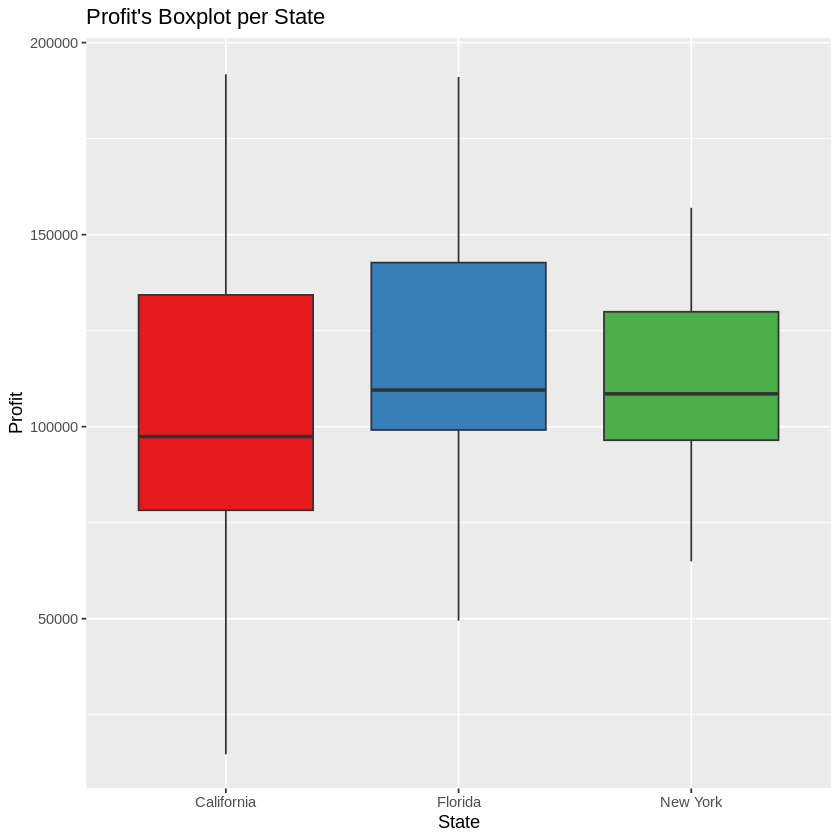

In [ ]:
#install.packages("ggplot2")
library(ggplot2)
variables <- c("R.D.Spend", "Administration", "Marketing.Spend", "Profit")
for (var in variables) {
  print(ggplot(dataset, aes(x = State, y = .data[[var]], fill = State)) +
    geom_boxplot(outlier.shape = NA) +
    scale_fill_brewer(palette = "Set1") +
    labs(title = paste(var, "'s Boxplot per State", sep = ""), x = "State", y = var) +
    guides(fill = FALSE))
}

# **Encoding categorical data**

In [ ]:
dataset$State = factor(dataset$State,
                       levels = c('New York', 'California', 'Florida'),
                       labels = c(1, 2, 3))

# **Splitting the dataset into the Training and Test sets**

Since I am using Google Colab with an R runtime, the first time I ran this section, it was necessary to install the caTools library.

In [ ]:
#install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Profit, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# **Fitting a Multiple Linear Regression to the Training set**

In [ ]:
regressor = lm(formula = Profit ~ .,
               data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ ., data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


# **Predicting the Test set results**

In [ ]:
y_pred = predict(regressor, newdata = test_set)
# Creting a data frame with the test set  predicctions and the actual values
results <- data.frame(y_pred = y_pred, y_test = test_set$Profit)
# Printing a comparative table
head(results)

,y_pred,y_test
,<dbl>,<dbl>
4,173981.1,182902.0
5,172655.6,166187.9
8,160250.0,155752.6
11,135513.9,146122.0
16,146059.4,129917.0
20,114151.0,122776.9


Not that bad, but as the goal is to select the best fit for this data, I will use the Backward Elimination method. In a posterior section, I will complement the model choice with Akaike's Information Criterion and show two ways to implement this elimination method using a preset function and a function with a loop.

# **Building the optimal model using Backward Elimination**

In [ ]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
               data = dataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33504  -4736     90   6672  17338 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.008e+04  6.953e+03   7.204 5.76e-09 ***
R.D.Spend        8.060e-01  4.641e-02  17.369  < 2e-16 ***
Administration  -2.700e-02  5.223e-02  -0.517    0.608    
Marketing.Spend  2.698e-02  1.714e-02   1.574    0.123    
State2           4.189e+01  3.256e+03   0.013    0.990    
State3           2.407e+02  3.339e+03   0.072    0.943    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9439 on 44 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9452 
F-statistic: 169.9 on 5 and 44 DF,  p-value: < 2.2e-16


**Optional Step:** It is up to you, but you can remove State2 only (as opposed to removing State directly). So, the code would be:

regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + factor(State, exclude = 2),
                data = dataset)
summary(regressor)

In [ ]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend,
               data = dataset)
summary(regressor)
regressor = lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
               data = dataset)
summary(regressor)
regressor = lm(formula = Profit ~ R.D.Spend,
               data = dataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33534  -4795     63   6606  17275 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.012e+04  6.572e+03   7.626 1.06e-09 ***
R.D.Spend        8.057e-01  4.515e-02  17.846  < 2e-16 ***
Administration  -2.682e-02  5.103e-02  -0.526    0.602    
Marketing.Spend  2.723e-02  1.645e-02   1.655    0.105    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9232 on 46 degrees of freedom
Multiple R-squared:  0.9507,	Adjusted R-squared:  0.9475 
F-statistic:   296 on 3 and 46 DF,  p-value: < 2.2e-16



Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.698e+04  2.690e+03  17.464   <2e-16 ***
R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16



Call:
lm(formula = Profit ~ R.D.Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-34351  -4626   -375   6249  17188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.903e+04  2.538e+03   19.32   <2e-16 ***
R.D.Spend   8.543e-01  2.931e-02   29.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9416 on 48 degrees of freedom
Multiple R-squared:  0.9465,	Adjusted R-squared:  0.9454 
F-statistic: 849.8 on 1 and 48 DF,  p-value: < 2.2e-16


By now,  R & D is the most significant spend to generate profits for these 50 startups. However, the penultimate model could also be a good choice. So, as I stated above, I will use the AIC to make this decision.

# **Two alternatives to automatically implement Backward selection**

## **Option 1: Using the step function**

In [ ]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
               data = dataset)
regressor_selection = step(regressor, direction = "backward")
summary(regressor_selection)

Start:  AIC=920.87
Profit ~ R.D.Spend + Administration + Marketing.Spend + State

                  Df  Sum of Sq        RSS     AIC
- State            2 5.1666e+05 3.9209e+09  916.88
- Administration   1 2.3816e+07 3.9442e+09  919.17
<none>                          3.9203e+09  920.87
- Marketing.Spend  1 2.2071e+08 4.1410e+09  921.61
- R.D.Spend        1 2.6878e+10 3.0799e+10 1021.94

Step:  AIC=916.88
Profit ~ R.D.Spend + Administration + Marketing.Spend

                  Df  Sum of Sq        RSS     AIC
- Administration   1 2.3539e+07 3.9444e+09  915.18
<none>                          3.9209e+09  916.88
- Marketing.Spend  1 2.3349e+08 4.1543e+09  917.77
- R.D.Spend        1 2.7147e+10 3.1068e+10 1018.37

Step:  AIC=915.18
Profit ~ R.D.Spend + Marketing.Spend

                  Df  Sum of Sq        RSS     AIC
<none>                          3.9444e+09  915.18
- Marketing.Spend  1 3.1165e+08 4.2560e+09  916.98
- R.D.Spend        1 3.1149e+10 3.5094e+10 1022.46



Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.698e+04  2.690e+03  17.464   <2e-16 ***
R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16


I will show the second option as an Annex.

# **Discussion**

According to the Backward Elimination, assuming we choose a significance level of *5%*, the best fit would be the model where R & D spending is the only and most significant variable explaining variations in profit. This model has a determination coefficient of *94.65%* and an adjusted one of *94.54%*.

However, another estimation could also be a good choice for this business problem, the model that considers  R & D and Marketing Spending for these startups, which makes sense. These kinds of companies are trying to make themselves recognized by their clients. Marketing spending may not be significant at *5%* but at *10%*. Furthermore, this model has a higher adjusted R-squared (*94.83%*), and according to the *step* function, this model was the one with the lowest AIC value (*915.18*).

To sum up, my recommendation for this Venture Capital fund is that they should base their investment decision on both the fifty startups' R & D and Marketing spending.

* Caeteris Paribus, it is expected that an increase of *1* dollar on R & D would increase a Startup profit by *80* cents.

* Caeteris Paribus, it is expected that a rise of *1* dollar in Marketing expenditure would correspondingly result in an increase of *3* cents in a Startup's profit.



## **Annex. Option 2: Backward Elimination wiht a function with a loop**

In [ ]:
backwardElimination <- function(x, sl) {
  numVars = length(x)
  for (i in c(1:numVars)){
    regressor = lm(formula = Profit ~ ., data = x)
    maxVar = max(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"])
    if (maxVar > sl){
      j = which(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"] == maxVar)
      x = x[, -j]
    }
    numVars = numVars - 1
  }
  return(summary(regressor))
}
# The SL can be adjusted when compared with the Opt. 1
SL = 0.05
dataset = dataset[, c(1,2,3,4,5)]
backwardElimination(training_set, SL)


Call:
lm(formula = Profit ~ ., data = x)

Residuals:
   Min     1Q Median     3Q    Max 
-34334  -4894   -340   6752  17147 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.902e+04  2.748e+03   17.84   <2e-16 ***
R.D.Spend   8.563e-01  3.357e-02   25.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9836 on 38 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9434 
F-statistic: 650.8 on 1 and 38 DF,  p-value: < 2.2e-16
